In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, accuracy_score, ConfusionMatrixDisplay

import missingno as msno
# import plotly_express as px
# from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [13]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs:", physical_devices)
# tf.config.experimental.set_visible_devices(physical_devices[1], 'GPU')

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
df = pd.read_csv("C:/Users/dianu/OneDrive/Desktop/code/cyberbully classify/dataset_preparation/categorical_data.csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [15]:
df = df.drop_duplicates()

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

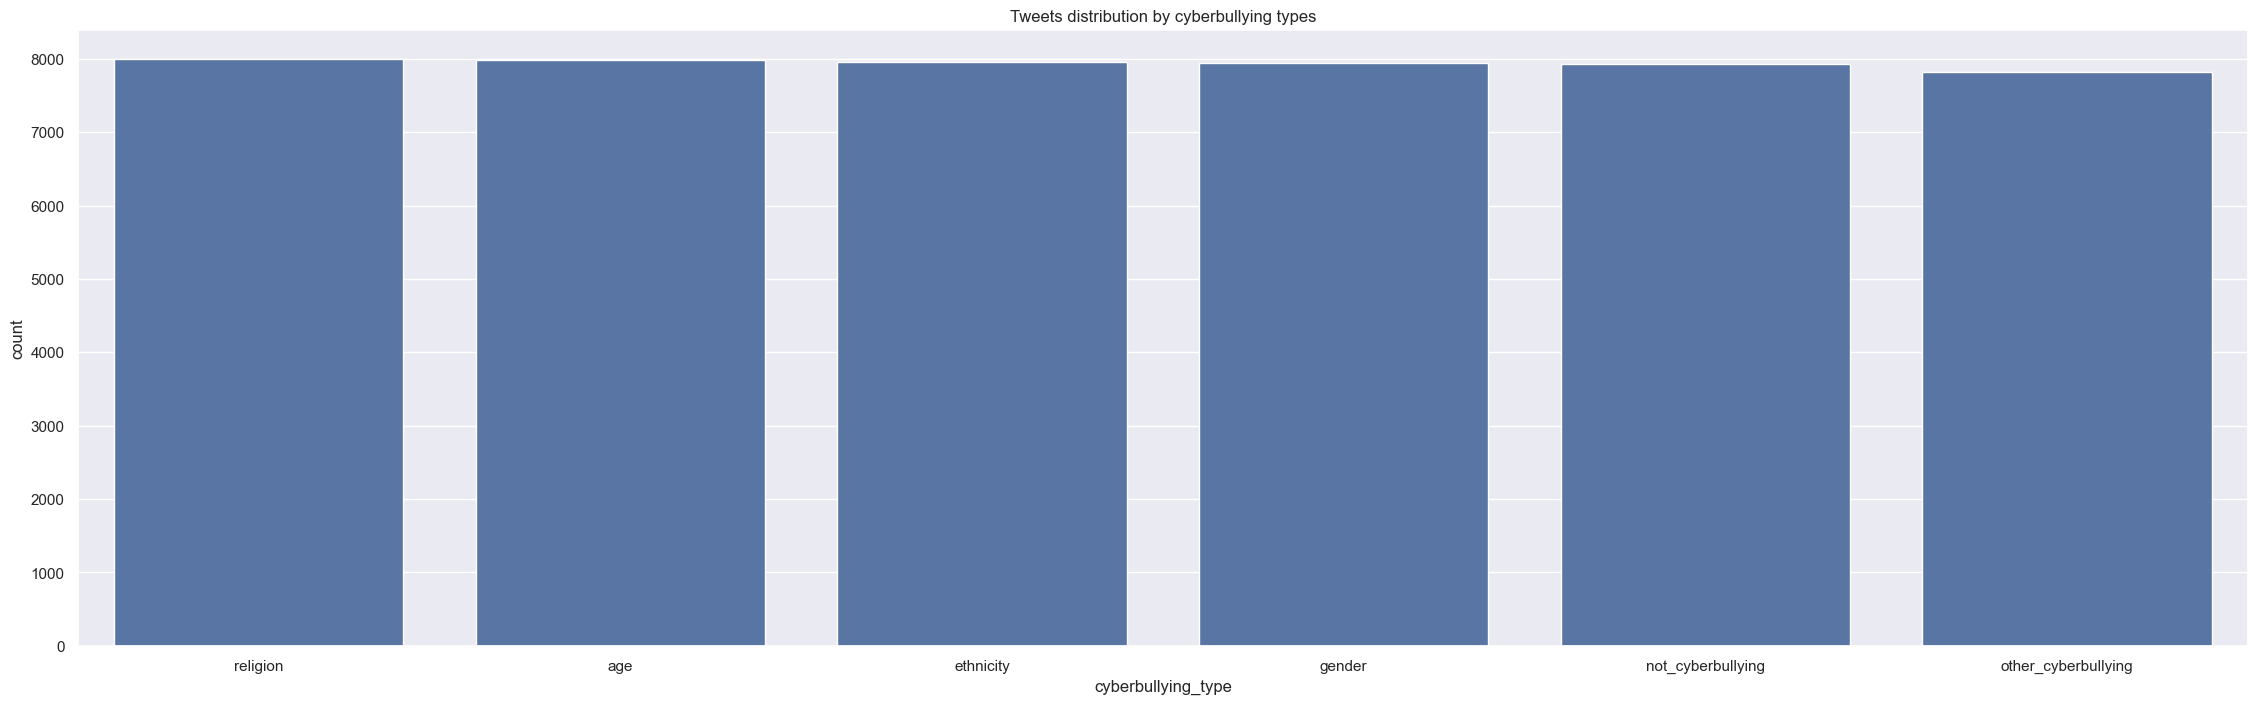

In [16]:
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [17]:
# classes=list(df["cyberbullying_type"].unique())
# df_list=[]

# flux=700-350
# for i in range(len(classes)):
#     sub_df=df[df["cyberbullying_type"]==classes[i]]
#     #drop first 7000 rows of sub_df
#     if (classes[i]=="other_cyberbullying"):
#         sub_df=sub_df.drop(sub_df.index[:6870+flux])
#     elif (classes[i]=="religion"):
#         sub_df=sub_df.drop(sub_df.index[:7050+flux])
#     elif (classes[i]=="age"):
#         sub_df=sub_df.drop(sub_df.index[:7050+flux])       
#     else:
#         sub_df=sub_df.drop(sub_df.index[:7000+flux])
#     df_list.append(sub_df)


# #concatenate all sub_df
# df_dropped=pd.concat(df_list)
# df_drop=df_dropped.reset_index()


# df = df_drop
# sns.set(rc={'figure.figsize':(28,8)})
# sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...


True

In [19]:
def initial_cleaning(text):
    # text = re.sub(r"^RT[\s]+","",text)
    # text = text.lower()
    # text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    # text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    # text = re.sub(r'[0-9]',' ',text) 
    # text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    # text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return initial_cleaning(text)

df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,tweet_text,cyberbullying_type,original_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,@XochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,@RudhoeEnglish This is an ISIS account pretend...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,"Black ppl aren't expected to do anything, depe..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,Turner did not withhold his disappointment. Tu...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,I swear to God. This dumb nigger bitch. I have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [23]:
import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

text_list_p=df["tweet_text"].tolist()
labels_p=df["cyberbullying_type"].tolist()

text_list=[]
labels=[]
for i in range(len(labels_p)):
    if text_list_p[i]!='':
        text_list.append(text_list_p[i])
        labels.append(labels_p[i])

labels=np.array(labels)


label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
num_classes=int(np.max(integer_encoded)+1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(num_classes, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)




omega_text_words = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [24]:
# import torch
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification,DistilBertTokenizer
from sklearn.model_selection import train_test_split
import transformers
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Permute
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.interpolate import CubicSpline

# from tabulate import tabulate
from tqdm import trange
import random

from tensorflow.keras import models, layers, optimizers

from datetime import datetime


In [25]:
#shuffler
def unison_shuffled_copies(a, b,c):
    assert len(a) == len(b==len(c))
    p = np.random.permutation(len(a))
    return a[p], b[p],c[p]


t=Tokenizer()
t.fit_on_texts(text_list)
vocab_size = len(t.word_index) + 1
X_encoded= t.texts_to_sequences(text_list)
max_len=max(len(l) for l in X_encoded)


Y=tf.keras.utils.to_categorical(integer_encoded, num_classes=6)

tokenizer_bert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
X_bert = [tokenizer_bert(text, padding='max_length', max_length = max_len, truncation=True)['input_ids'] for text in text_list]
X_bert = np.array(X_bert, dtype='int32')
Mask_bert= [tokenizer_bert(text, padding='max_length', max_length = max_len, truncation=True)['attention_mask'] for text in text_list]
Mask_bert = np.array(Mask_bert, dtype='int32')
X=X_bert
Z=Mask_bert





X,Y,Z=unison_shuffled_copies(X, Y,Z)


# Split the dataset
val_split_percent=0.2
test_split_percent=0.1
split_train = int(len(X)*(1-val_split_percent-test_split_percent))
split_valid = int(len(X)*(1-test_split_percent))

# Train
X_train = X[:split_train, :]; y_train=Y[:split_train, :]; z_train=Z[:split_train, :]

# Valid
X_valid = X[split_train:split_valid,:]; y_valid=Y[split_train:split_valid,:]; z_valid=Z[split_train:split_valid,:]

# Test
X_test = X[split_valid:,:]; y_test=Y[split_valid:,:]; z_test=Z[split_valid:,:]

   
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

tokenizer_config.json: 100%|██████████| 28.0/28.0 [00:00<00:00, 54.7kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 534kB/s]
tokenizer.json: 100%|██████████| 466k/466k [00:00<00:00, 1.91MB/s]
config.json: 100%|██████████| 483/483 [00:00<?, ?B/s] 


(33355, 873) (33355, 6)
(9530, 873) (9530, 6)
(4766, 873) (4766, 6)


In [26]:
config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
dbert = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config, trainable=False)

model.safetensors: 100%|██████████| 268M/268M [00:35<00:00, 7.57MB/s] 
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [27]:
input_ids_in = layers.Input(shape=(max_len,), name='input_token', dtype='int32')
masks= layers.Input(shape = (max_len,), dtype='int32')
x = dbert(input_ids=input_ids_in,attention_mask=masks)[0][:,0,:]
x= layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01))(x)
x= layers.Dropout(0.5)(x)
x= layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01))(x)
x= layers.Dropout(0.5)(x)
x = layers.Dense(6, activation='softmax', name='classification')(x)

dmodel = models.Model(inputs=[input_ids_in,masks], outputs = x)

dmodel.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy', metrics=['accuracy'])
dmodel.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 873)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 873)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_token[0][0]',            
 BertModel)                     ast_hidden_state=(N               'input_1[0][0]']                
                                one, 873, 768),                                                   
                                 hidden_states=None                                           

In [29]:
# Train the model
start_time = datetime.now()
history = dmodel.fit([X_train,z_train], y_train, batch_size=32, shuffle=True, epochs=50, validation_data=([X_valid,z_valid], y_valid))
end_time = datetime.now()

training_time_bert = (end_time - start_time).total_seconds()

Epoch 1/50
1043/1043 [==============================] - 1411s 1s/step - loss: 1.8641 - accuracy: 0.6203 - val_loss: 1.0505 - val_accuracy: 0.7058
Epoch 2/50
1043/1043 [==============================] - 1392s 1s/step - loss: 1.1483 - accuracy: 0.6616 - val_loss: 0.9821 - val_accuracy: 0.7258
Epoch 3/50
1043/1043 [==============================] - 1363s 1s/step - loss: 1.1040 - accuracy: 0.6590 - val_loss: 0.9395 - val_accuracy: 0.7238
Epoch 4/50
1043/1043 [==============================] - 1383s 1s/step - loss: 1.0706 - accuracy: 0.6606 - val_loss: 0.8752 - val_accuracy: 0.7383
Epoch 5/50
1043/1043 [==============================] - 1376s 1s/step - loss: 1.0663 - accuracy: 0.6568 - val_loss: 0.8809 - val_accuracy: 0.7260
Epoch 6/50
1043/1043 [==============================] - 1232s 1s/step - loss: 1.0549 - accuracy: 0.6574 - val_loss: 0.8808 - val_accuracy: 0.7374
Epoch 7/50
1043/1043 [==============================] - 1233s 1s/step - loss: 1.0432 - accuracy: 0.6592 - val_loss: 0.8295 -

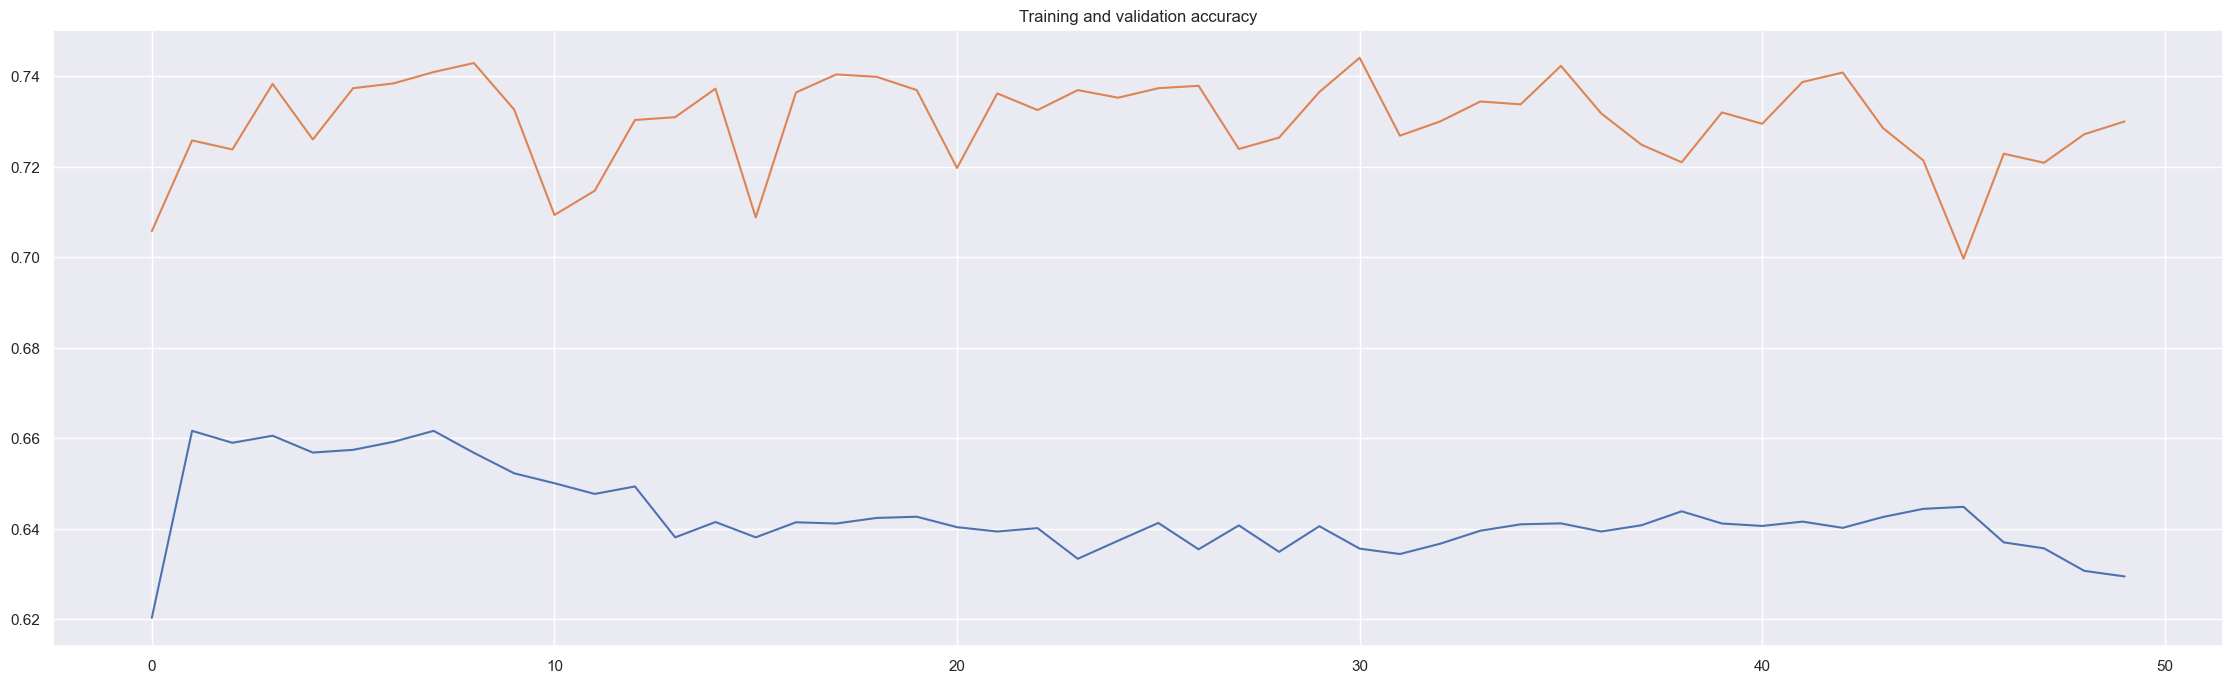

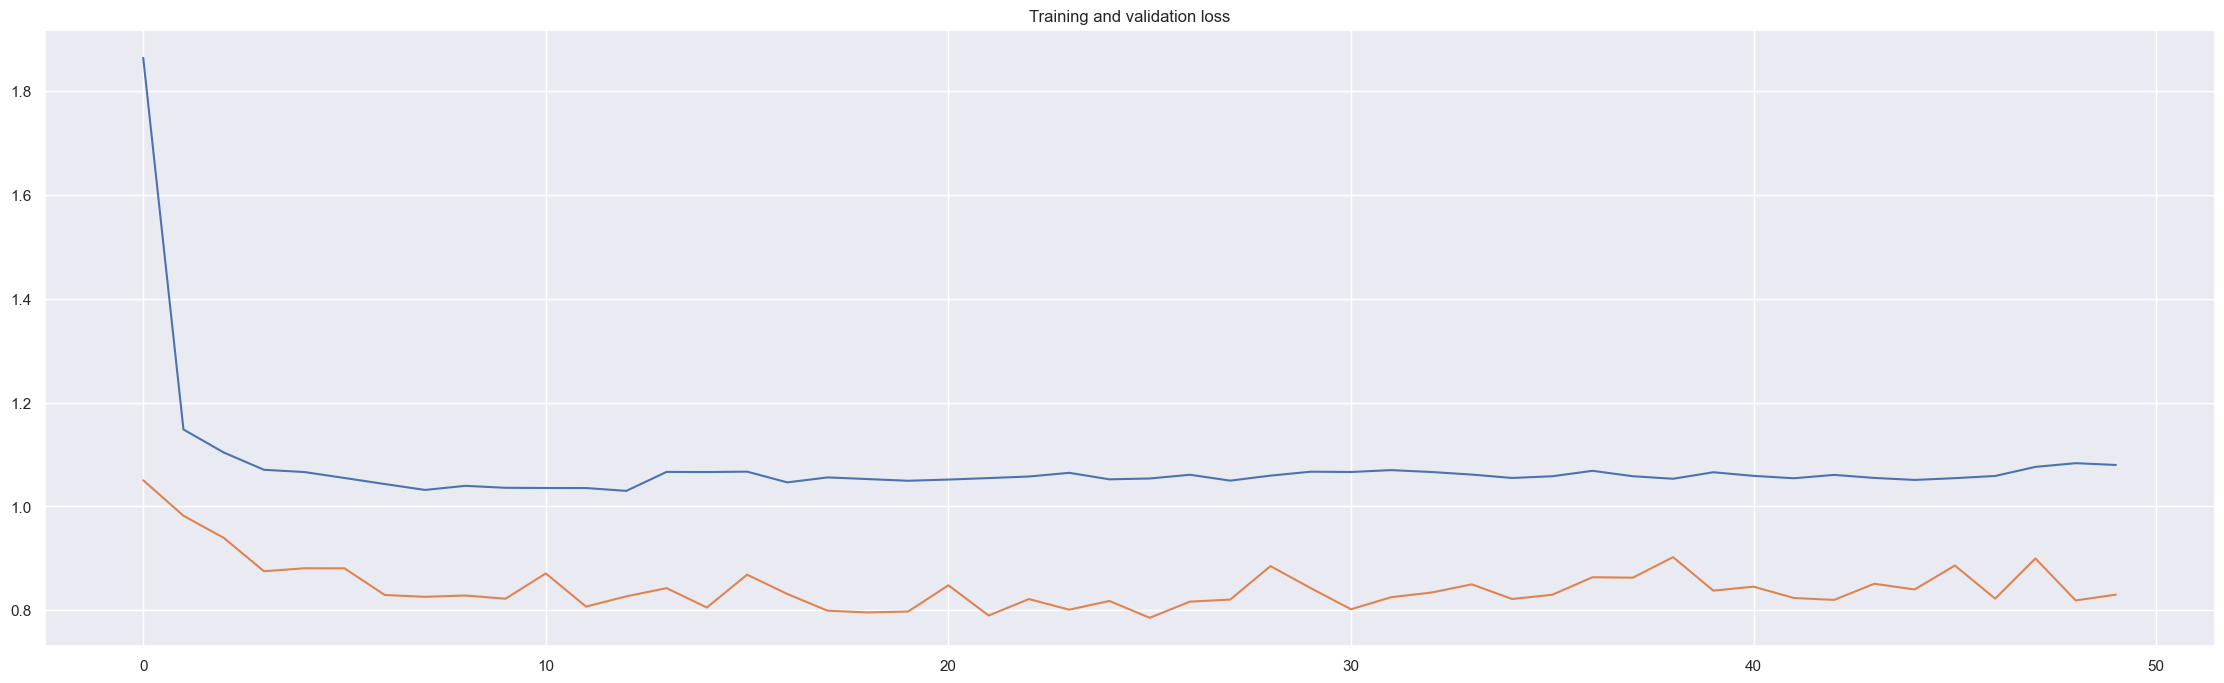

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')



# save val_loss, val_acc, loss, acc as csv with headers
import pandas as pd
df = pd.DataFrame({'val_loss':val_loss, 'val_acc':val_acc, 'loss':loss, 'acc':acc})
df.to_csv('distilbert_mlp.csv', index=False)

In [31]:
_, acc = dmodel.evaluate([X_test,z_test], y_test)
print("Accuracy = ", (acc * 100.0), "%")

149/149 [==============================] - 119s 796ms/step - loss: 0.8288 - accuracy: 0.7220
Accuracy =  72.1989095211029 %


In [32]:
accuracy_bert = history.history['val_accuracy'][-1]
print('Accuracy Training data: {:.1%}'.format(history.history['accuracy'][-1]))
print('Accuracy Test data: {:.1%}'.format(history.history['val_accuracy'][-1]))
print('Training time: {:.1f}s (or {:.1f} minutes)'.format(training_time_bert, training_time_bert/60))

Accuracy Training data: 62.9%
Accuracy Test data: 73.0%
Training time: 67760.4s (or 1129.3 minutes)


149/149 [==============================] - 120s 793ms/step


<Axes: >

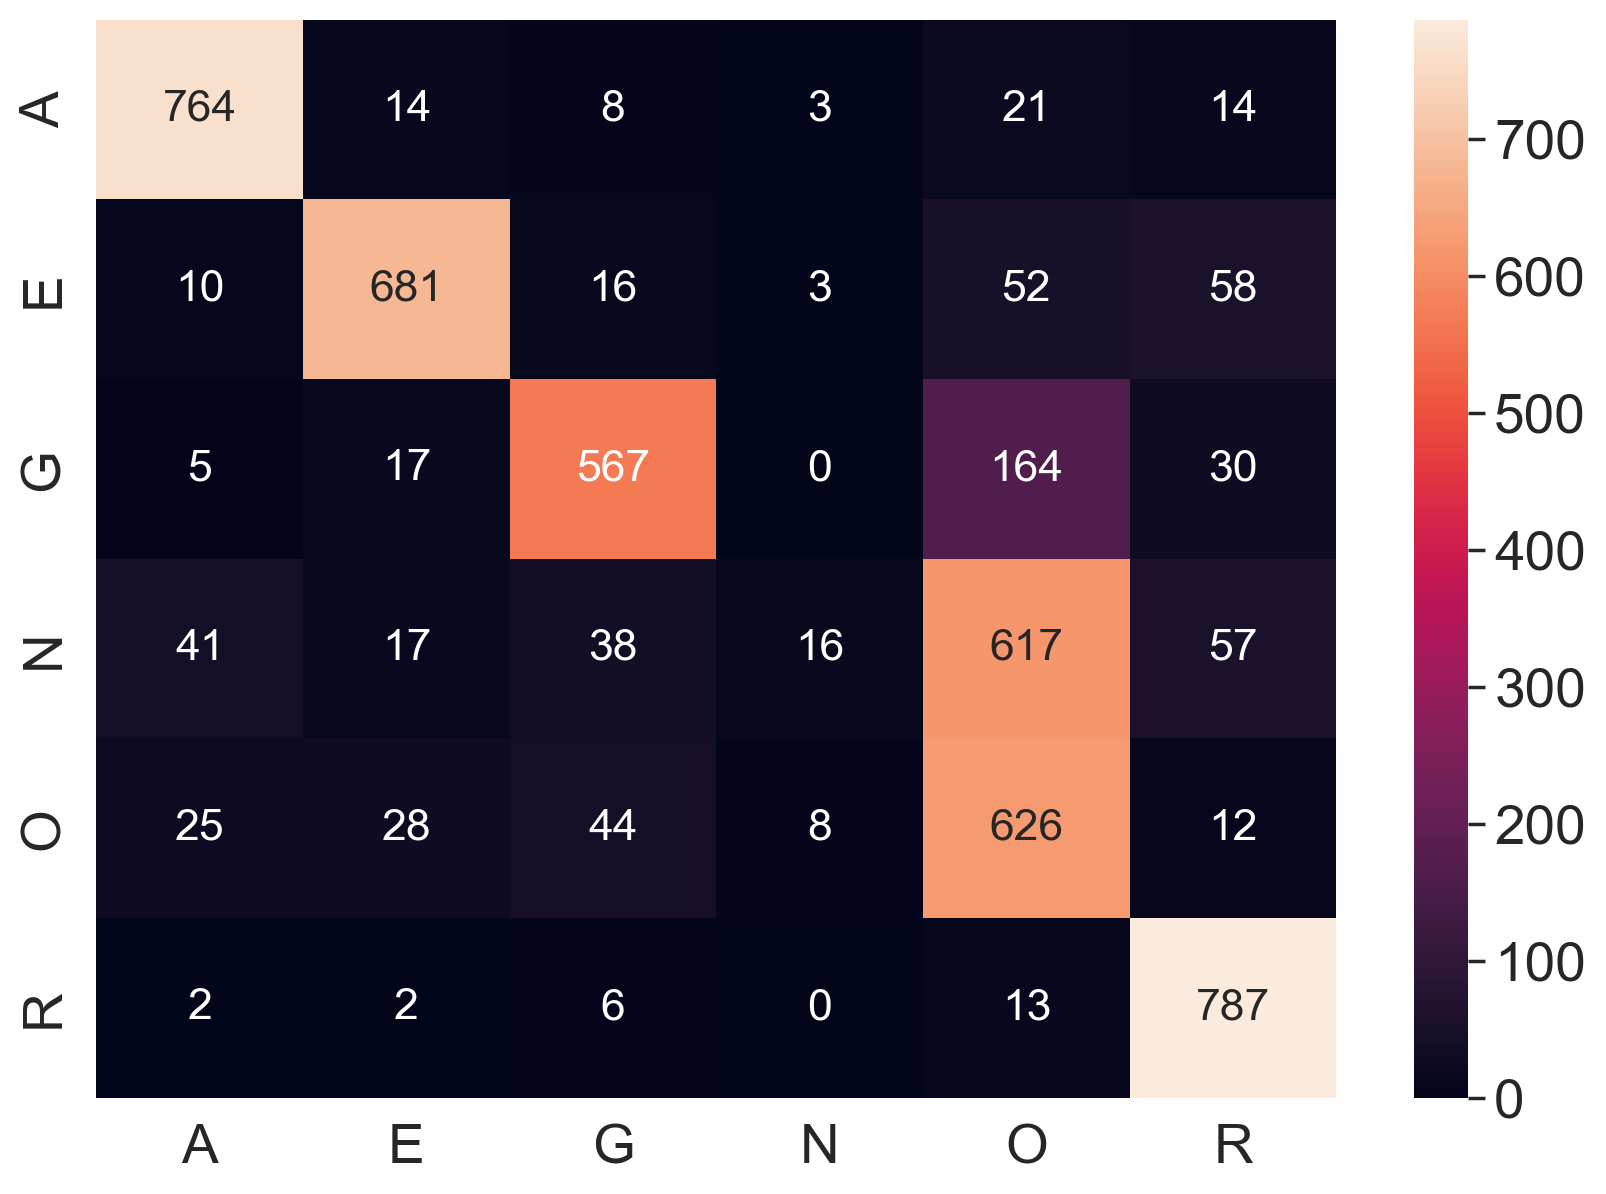

In [33]:
ref=np.argmax(y_test,axis=1)
predictions=np.argmax(dmodel.predict([X_test,z_test]),axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ref,predictions)



label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
label_abbreviations = [label[0].upper() for label in label_names]


#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, label_abbreviations, label_abbreviations)
plt.figure(figsize = (10,7),dpi=200)
sn.set(font_scale=1.8)  # Increase the font size for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

In [34]:
from sklearn.metrics import classification_report

print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9020    0.9272    0.9144       824
           1     0.8972    0.8305    0.8626       820
           2     0.8351    0.7241    0.7756       783
           3     0.5333    0.0204    0.0392       786
           4     0.4193    0.8425    0.5599       743
           5     0.8215    0.9716    0.8903       810

    accuracy                         0.7220      4766
   macro avg     0.7347    0.7194    0.6737      4766
weighted avg     0.7404    0.7220    0.6790      4766

